#Importing the required Python libraries, frameworks and/or Modules for various Data Science tasks like


1.   Data Preprocessing
2.   Data Wrangling
3.   Data Visualization
4.   Correlation Analysis
5.   Feature Extraction
6.   Implementation of Machine Learning Models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Reading data using Pandas Library

In [3]:
url = "/content/drive/MyDrive/Data Mining Class/Shallow Learning/iris_data.data"
attr_names = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv(url, names = attr_names)

##Look at following parameters for gaining instant general info of your data.


1.   Overall shape of data to know how many number of "Rows" and "Columns" exist. Note that the first value will show No. of Rows and the second value will represent the No. of Columns. Example (122 , 32) means there are 122 Rows and 32 Columns.
2.   The "head" of data set to observe the "Attribute Names" and the "type of values" stored in each attribute as they give us useful technical information about our dataset like


*   Some Attribute names are self explainatory and give us a quick idea of knowledge/information being stored in that specific attribute
*   The type of values in our attributes tell us about "Data Types"; as it it very significant to know that our Machine Learning models only train on numeric data and not on any other data type like string/object data type. So if there is an attribute with string/object data type we need to first convert it into numeric/int64 data type or if it has no significant impact on our data analysis then we can discard/drop that attribute.


3.  General Statistical Description of data to know basic stats measures like Standard Deviation, Five Number Summary (which include min, max, Q1, Q2/median, Q3) and the Count (Total number of values stored in that specific attribute). One important thing to keep in mind is that that Satistical Descriptions will be performed only on numeric data and not on attributes whose data type is object/string as we do not get all the statistical measures (especially the "Measures of Central Tendencies) for such attributes.


In [4]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
print(df.shape)

(150, 5)


In [6]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Using "groupby" method to check how many instances for each class exist in our class label feature "class"

In [7]:
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Visual representation of outliers using "Box Plot"

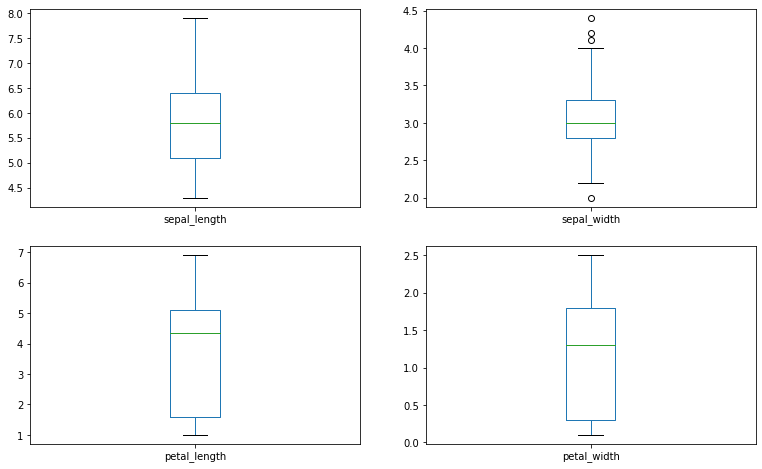

In [31]:
df.plot(kind = 'box', figsize=(13,8), subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

# Visual representation of each feature using histogram.

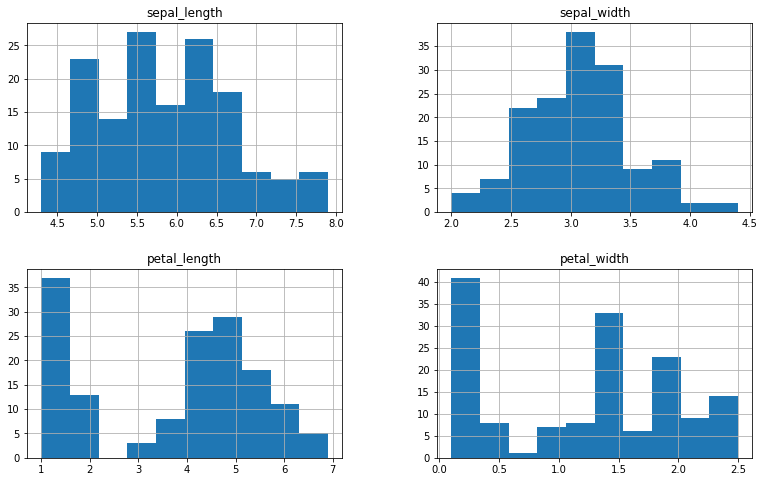

In [32]:
df.hist(figsize=(13,8))
plt.show()

# Visual Representation of Dependent variables using the "Scatter Matrix". The scatter matrix tells us about the overall distribution of data.

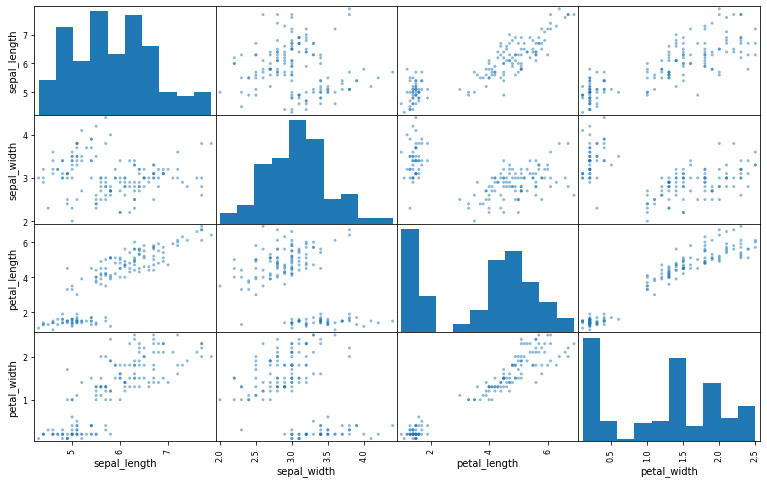

In [35]:
scatter_matrix(df, figsize=(13,8))
plt.show()

# Same visualization using scatter matrix but in Seaborn Library. Here we call it "pairplot" It is visible that Seaborn library can generate more aesthetic visualization of our data.

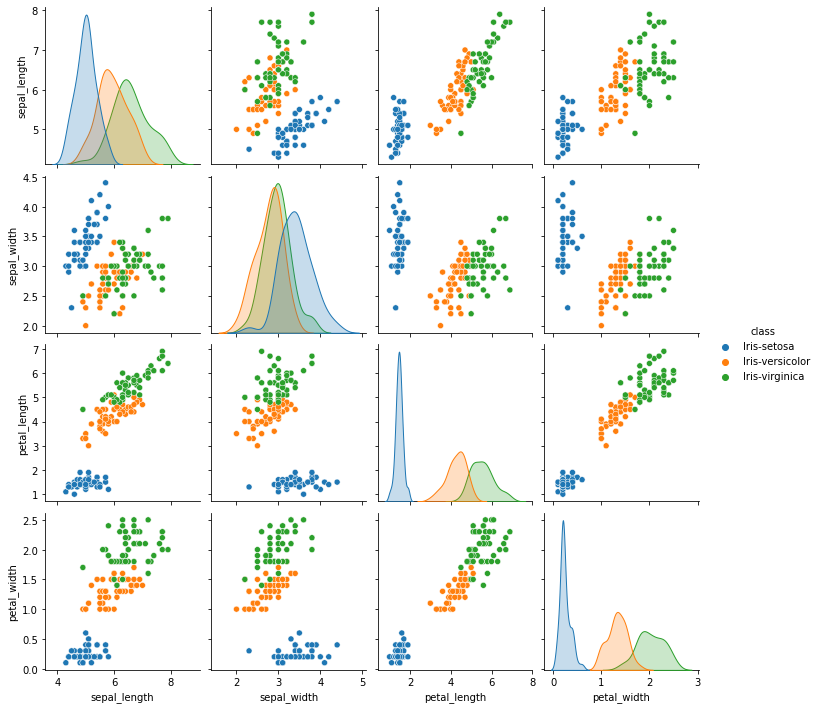

In [11]:
sns.pairplot(df, hue='class')

# Line plot visualization of "Sepal Length" Feature

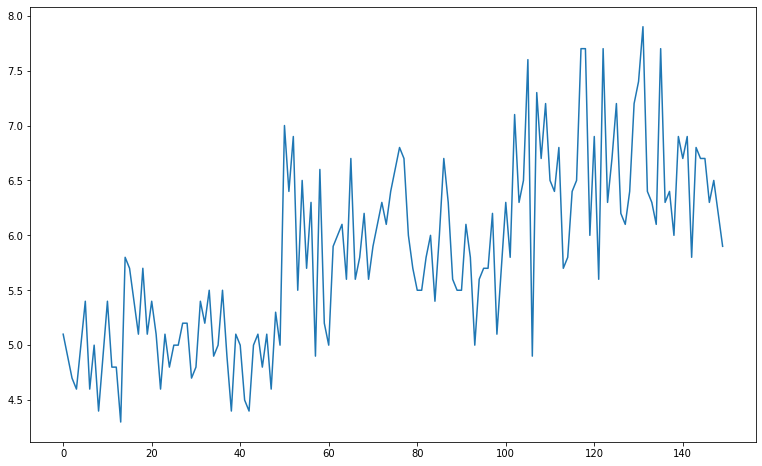

In [36]:
df["sepal_length"].plot(figsize=(13,8))

In [13]:
feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
x = df[feature_cols]
y = df['class']

# Converting our "Class" feature into category codes as our "class" attibute/feature is of object data type and M.L models only train on numeric data. 

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y=le.fit_transform(y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Importing test_train_split and "metrics" modules from sklearn library to split our data into test_train split.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Implementing Decision Tree Algorithm on our data

In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Checking the "Accuracy" of our model.

*   List item
*   List item



In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


# Generating the Confusion matrix for our Decision Tree model.

In [19]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

# Implementing Naive-Bayes Algorithm

In [37]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

# Checking the "Accuracy" of our model.

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


# Generating the Confusion matrix for our model.

In [39]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2])

array([[16,  0,  0],
       [ 0,  5,  0],
       [ 0,  1,  8]])

# Implementing KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Checking the "Accuracy" of our model.

In [41]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9666666666666667


# Generating the Confusion matrix for our model.

In [23]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2])

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])